# Segmentation Based on Consumer

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
import geopandas as gpd


In [68]:
df = pd.read_csv('/Users/rajdipingale/Downloads/electricity_bill_dataset 2.csv')


In [8]:
df2 = pd.read_csv('/Users/rajdipingale/Downloads/electricity_bill_dataset 2.csv')
df2.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [14]:
df2.sample(20)

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
31303,5,18.0,2.0,22.0,7.0,0,12,Nagpur,Unitech Power Transmission Ltd.,675,8.9,6007.5
17715,10,18.0,3.0,3.0,1.0,0,2,Dahej,Orient Green,371,7.6,2819.6
33253,13,22.0,0.0,20.0,1.0,0,3,Pune,Reliance Power,442,9.1,4022.2
38052,22,22.0,3.0,22.0,12.0,0,8,Ahmedabad,NTPC Pvt. Ltd.,720,7.9,5688.0
2379,6,19.0,3.0,7.0,7.0,0,11,Vadodara,Orient Green,349,7.8,2722.2
20198,6,20.0,1.0,9.0,1.0,0,10,Hyderabad,Sterlite Power Transmission Ltd,477,8.4,4006.8
20674,13,23.0,1.0,22.0,1.0,0,3,Nagpur,Optibelt Power Transmission India Private Limited,727,8.9,6470.3
24901,5,21.0,2.0,9.0,1.0,0,4,Nagpur,Indowind Energy,502,8.9,4467.8
3936,5,18.0,0.0,19.0,1.0,0,7,Noida,NLC India,512,8.2,4198.4
1102,16,23.0,0.0,14.0,1.0,0,7,Kolkata,Sunil Hitech Eng,535,8.7,4654.5


<Axes: xlabel='count', ylabel='City'>

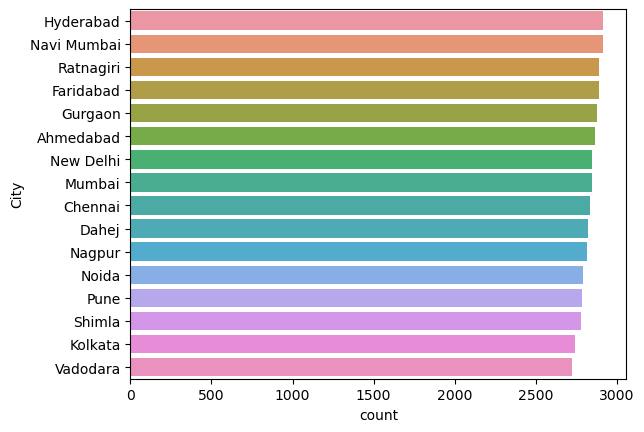

In [16]:
sns.countplot(y=df2['City'], order=df2['City'].value_counts().index)

<Axes: xlabel='count', ylabel='Company'>

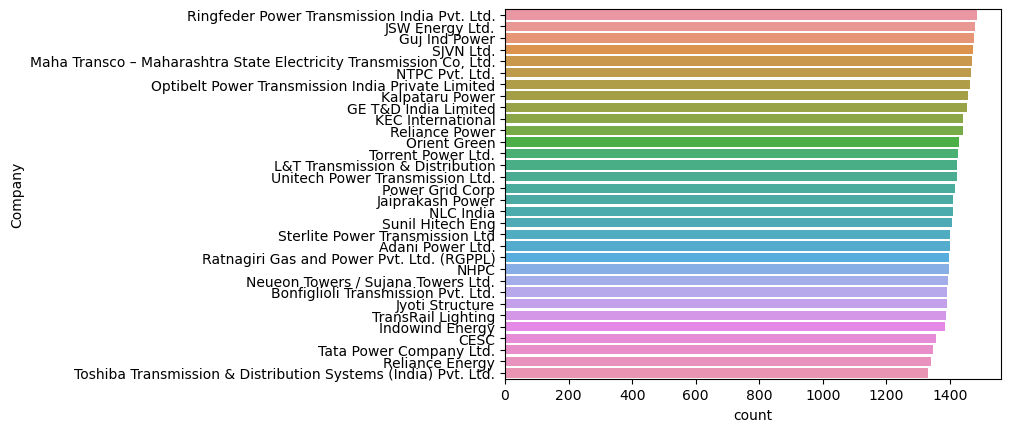

In [18]:
sns.countplot(y=df2['Company'], order=df2['Company'].value_counts().index)

## Transformation of variables

In [22]:
labelEncoding = LabelEncoder()
df2['City'] = labelEncoding.fit_transform(df2['City'])
df2['Company'] = labelEncoding.fit_transform(df2['Company'])

In [24]:
df2.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,5,27,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,15,13,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,14,8,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,7,19,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,7,20,457,9.2,4204.4


##  Clustering

In [28]:
X = df2.values


### K Means

/Users/rajdipingale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajdipingale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajdipingale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajdipingale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

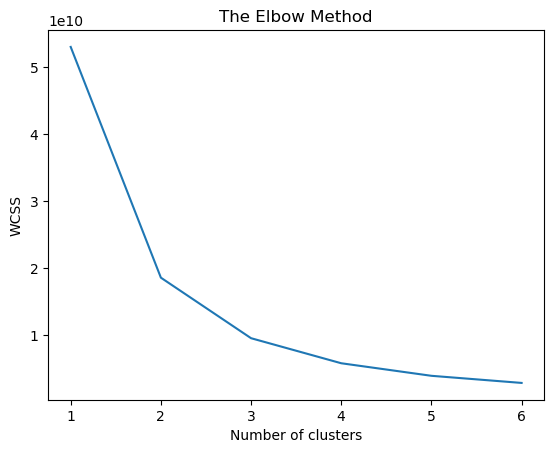

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/Users/rajdipingale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
y_kmeans = kmeans.labels_
y_kmeans

array([1, 0, 1, ..., 2, 2, 1], dtype=int32)

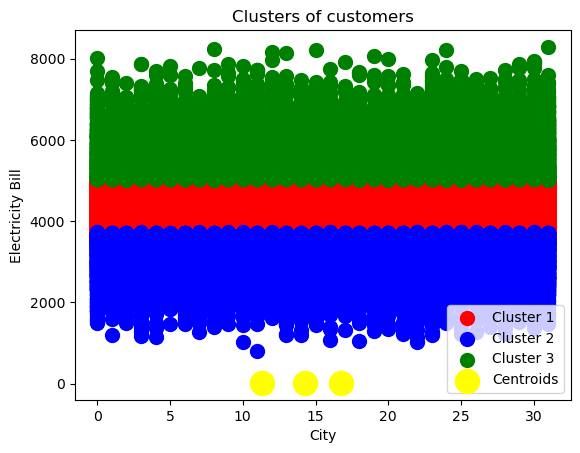

In [44]:
plt.scatter(X[y_kmeans == 0, 8], X[y_kmeans == 0, 11], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 8], X[y_kmeans == 1, 11], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 8], X[y_kmeans == 2, 11], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.ylabel('Electricity Bill')
plt.xlabel('City')
plt.legend()
plt.show()

### Geographic Segmentation

In [61]:
import geopandas as gpd


In [53]:
file = "/Users/rajdipingale/Downloads/india_cities/india_cities.shp"

In [82]:
map_df = gpd.read_file(file)

In [84]:
map_df.head()

,cartodb_id,city,lat,lon,state,geometry
0,1,Agra,27.172187,78.007819,Uttar Pradesh,MULTIPOINT (78.00782 27.17219)
1,2,Ahmedabad,23.022868,72.572522,Gujarat,MULTIPOINT (72.57252 23.02287)
2,3,Allahabad,25.433826,81.846377,Uttar Pradesh,MULTIPOINT (81.84638 25.43383)
3,4,Amritsar,31.632940,74.872693,Punjab,MULTIPOINT (74.87269 31.63294)
4,5,Asansol,23.677213,86.950671,West Bengal,MULTIPOINT (86.95067 23.67721)


In [104]:
file = "/Users/rajdipingale/Downloads/Geo India/IND_adm1.shp"
boundries = gpd.read_file(file)
boundries.plot

In [108]:
df["cluster"] = y_kmeans


In [112]:
merged = map_df.set_index('city').join(df.set_index('City')) 


In [114]:
merged


,cartodb_id,lat,lon,state,geometry,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,Company,MonthlyHours,TariffRate,ElectricityBill,cluster
Agra,1,27.172187,78.007819,Uttar Pradesh,MULTIPOINT (78.00782 27.17219),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ahmedabad,2,23.022868,72.572522,Gujarat,MULTIPOINT (72.57252 23.02287),16.0,22.0,3.0,14.0,1.0,0.0,6.0,Neueon Towers / Sujana Towers Ltd.,450.0,7.9,3555.0,1.0
Ahmedabad,2,23.022868,72.572522,Gujarat,MULTIPOINT (72.57252 23.02287),11.0,22.0,3.0,19.0,1.0,0.0,11.0,Indowind Energy,565.0,7.9,4463.5,0.0
Ahmedabad,2,23.022868,72.572522,Gujarat,MULTIPOINT (72.57252 23.02287),18.0,22.0,2.0,15.0,1.0,0.0,6.0,Orient Green,484.0,7.9,3823.6,0.0
Ahmedabad,2,23.022868,72.572522,Gujarat,MULTIPOINT (72.57252 23.02287),9.0,23.0,3.0,17.0,7.0,0.0,9.0,Ringfeder Power Transmission India Pvt. Ltd.,487.0,7.9,3847.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Varanasi,47,25.319427,82.973768,Uttar Pradesh,MULTIPOINT (82.97377 25.31943),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vasai-Virar City,48,19.387647,72.839545,Maharasthra,MULTIPOINT (72.83954 19.38765),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vellore,75,12.916517,79.132499,Tamil Nadu,MULTIPOINT (79.1325 12.91652),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vijayawada,49,16.506200,80.648000,Andhra Pradesh,MULTIPOINT (80.648 16.5062),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


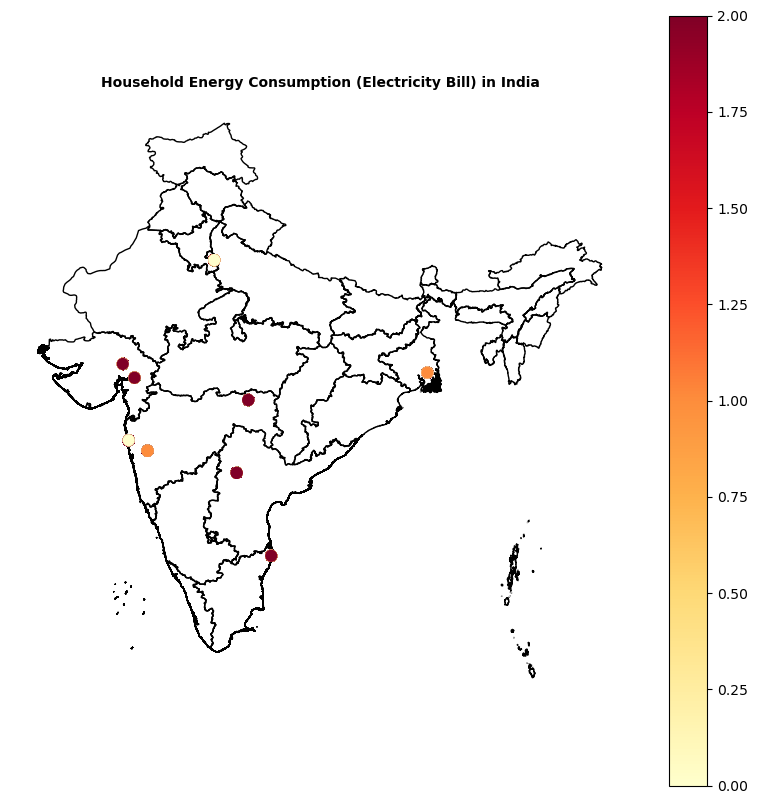

In [148]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")

# Plot the boundary
boundries.plot(ax=ax, color='none', edgecolor='black')

# Plot the points
merged.plot(column="cluster", cmap='YlOrRd', markersize=60, ax=ax, legend=True)

# Add title
ax.set_title('Clusters of Energy consumers', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.show()
